In [124]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

def mid(npArr):
    return npArr.sum() / len(npArr)

#Расчет косвенной погрешности, если величина - произведение и частное данных
def sigma_mulls(val, sigsArr, parmsArr):
    sum = 0
    for i in range(len(sigsArr)):
        sum += (sigsArr[i] / parmsArr[i])**2
    return val * (sum)**0.5


#Расчет случайной погрешности среднего
def sigma_rand(valsArr):
    N = len(valsArr)
    valMid = sum(valsArr) / N
    msum = 0
    for val in valsArr:
        msum += (val - valMid)**2
        
    return (msum / (N * (N - 1))) ** 0.5


#MNK если y = kx
##DEPRECATED
def k_only(x, y):
    return mid(x * y) / mid(x * x)

##DEPRECATED
def k_only_sigma(x, y):
    return ((mid(x * x) * mid(y * y) - mid(x * y)**2) / (len(x) * mid(x * x)**2))**0.5

#MNK для y = kx + a
def k_coef(x, y):
    return (mid(x * y) - mid(x) * mid(y)) / (mid(x * x) - mid(x)**2)

def b_coef(x, y):
    return mid(y) - k_coef(x, y) * mid(x)

def k_sigma(x, y):
    return ((mid(y * y) - mid(y)**2) / (mid(x * x) - mid(x)**2) - k_coef(x, y)**2)**0.5  / len(x)**0.5






In [125]:
wavelenCalibration = np.array ([6717.04, 6598.95, 6402.24, 6266.59, 6143.06, 5975.53, 5400.56,
                                6907., 6234., 5791., 5461., 4916., 4358., 4047.]) 
degrees = np.array ([2500, 2458, 2386, 2334, 2286, 2208, 1888, 
                                2556, 2320, 2116, 1926, 1502, 838, 284])




# интерполируем многочленом сразу порядка 4

In [126]:
approx = np.polyfit (degrees, wavelenCalibration, 4)

# калибровочный график


No handles with labels found to put in legend.


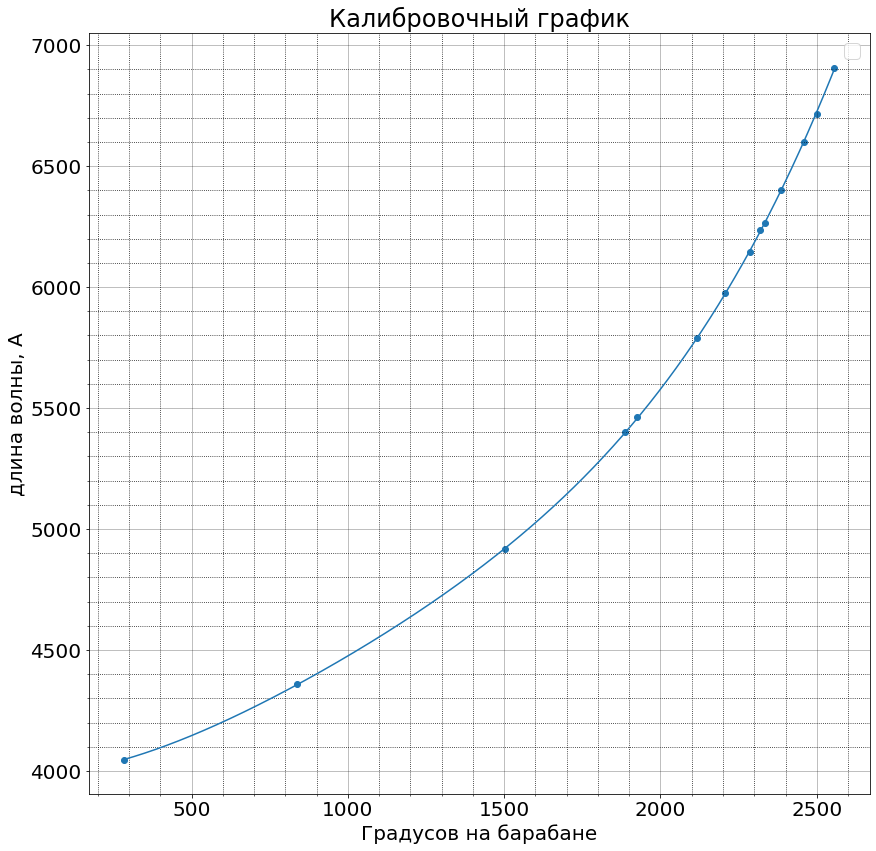

In [127]:
mpl.rcParams['font.size'] = 20
    

fig, ax = plt.subplots()

ax.set_title("Калибровочный график")
ax.set_ylabel(r"длина волны, А")
ax.set_xlabel(r"Градусов на барабане")

fig.set_figwidth(14)
fig.set_figheight(14)

ax.scatter(degrees, wavelenCalibration)

xs = np.linspace (np.min (degrees), np.max (degrees), 10000)
ys = np.polyval (approx, xs)
ax.plot (xs, ys)
# ax.plot(dists, throughputs, label="now")
# ax.plot(distsOld, throughputsOld, label="old")
# ax.errorbar(Carr, Tarr, yerr=0.02, xerr=0.0005, fmt='.') 

ax.minorticks_on()

ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5,
       alpha = 0.5)

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.legend()
plt.savefig('graphs/52_2_and_3_calibration.png')
plt.show()

# Определим по градуировочной кривой теперь длины волн линий водорода $H_\alpha, H_\beta, H_\gamma $

In [128]:
HDegrees = np.array ([2444, 1450, 808])
wavelenH = np.polyval (approx, HDegrees)
print (wavelenH)

[6559.7291466  4866.52831832 4336.03642837]


Найдем и усредним постоянную Ридберга

In [129]:
m = np.array([3., 4., 5.])
Z = 1 #1.602 * 1e-19
print (e)
R = m**2 * 4 / (wavelenH * Z**2 * (m**2 - 4)) #4 = n**2
RSigma = sigma_rand (R)
print (mid (R * 1e8))
print (RSigma * 1e8)

1.602e-19
109724.79670811899
68.61617151594449


переходим к йоду

In [134]:
DegreeI = np.array ([1850, 1450, 808])
wavelenI = np.polyval (approx, DegreeI) / 1e10
wavelenI

array([5.34417571e-07, 4.86652832e-07, 4.33603643e-07])

In [136]:
h = 6.626 * 1e-34
c = 3 * 1e8
e = 1.602 * 1e-19
freq =  c / wavelenI
E = h * (freq[1] - freq[0]) / 5 / e
E

0.045577195308865726

In [130]:
# mpl.rcParams['font.size'] = 20
    

# fig, ax = plt.subplots()

# ax.set_title("Логарифм числа частиц от толщины пройденного материала")
# ax.set_ylabel(r"$ln(N)$")
# ax.set_xlabel(r"$Толщина, ....$")

# fig.set_figwidth(14)
# fig.set_figheight(14)

# ax.scatter(dists, throughputs)
# ax.scatter(distsOld, throughputsOld)

# k = k_coef(Carr, Tarr)
# b = b_coef(Carr, Tarr)
# xTwoPoint = np.linspace(0, Carr[-1], 2)
# yForTwoPoint = k * xTwoPoint + b 


# mStyle = ['--', '-', '-.', ':'] 

# #ax.plot(xTwoPoint, yForTwoPoint, label=r'T = %f * C + %f'%(k, b), linestyle=mStyle[3])
# ax.plot(dists, throughputs, label="now")
# ax.plot(distsOld, throughputsOld, label="old")
# # ax.errorbar(Carr, Tarr, yerr=0.02, xerr=0.0005, fmt='.') 

# ax.minorticks_on()

# ax.grid(which='major',
#         color = 'k', 
#         linewidth = 0.5,
#        alpha = 0.5)

# ax.grid(which='minor', 
#         color = 'k', 
#         linestyle = ':')

# plt.legend()
# plt.savefig('graph.jpeg')
# plt.show()
